<a href="https://colab.research.google.com/github/Yejide123/Nigeria_2023_Sentiment-Analysis/blob/main/Project_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import re
import nltk
sns.set()
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Project_codes/train_labelled_data.csv" # reading in the labelled data
train_data = pd.read_csv(path)

In [ ]:
train_data

,Unnamed: 0,text,cleaned_text,scores,label
0,0,#OBI and #wife storm kastina state today.\n\nS...,wife storm kastina state todaysee crowd nigeri...,0.6249,positive
1,1,"If they can’t point to you one project , inves...",can ’ t point one project investment vision le...,0.2500,positive
2,2,@atiku God with his infinite mercy will never ...,god infinite mercy never allow emerge presiden...,-0.6874,negative
3,3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,rotimiakeredolu take asiwaju bola ahmed tinubu...,0.0000,neutral
4,4,@atiku Salutation is not Love. #Obi is coming,salutation love obi come,0.6369,positive
...,...,...,...,...,...
62137,74558,"I wish to convey my sympathies to the victims,...",wish convey sympathy victim gov zulum shehu bo...,0.4767,positive
62138,74559,I received with great sadness reports of the r...,receive great sadness report raze popular maid...,0.3818,positive
62139,74560,My deepest condolences to his family and the F...,deep condolence family fct pdp family may soul...,0.5423,positive
62140,74561,Hon Sunday Zaka truly embodied the Recovery sp...,sunday zaka truly embody recovery spirit pdp e...,0.5574,positive


In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from tqdm import tqdm

In [ ]:
!pip install transformers

!pip install imbalanced-learn


In [ ]:
train_data

,Unnamed: 0,text,cleaned_text,scores,label
0,0,#OBI and #wife storm kastina state today.\n\nS...,wife storm kastina state todaysee crowd nigeri...,0.6249,positive
1,1,"If they can’t point to you one project , inves...",can ’ t point one project investment vision le...,0.2500,positive
2,2,@atiku God with his infinite mercy will never ...,god infinite mercy never allow emerge presiden...,-0.6874,negative
3,3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,rotimiakeredolu take asiwaju bola ahmed tinubu...,0.0000,neutral
4,4,@atiku Salutation is not Love. #Obi is coming,salutation love obi come,0.6369,positive
...,...,...,...,...,...
62137,74558,"I wish to convey my sympathies to the victims,...",wish convey sympathy victim gov zulum shehu bo...,0.4767,positive
62138,74559,I received with great sadness reports of the r...,receive great sadness report raze popular maid...,0.3818,positive
62139,74560,My deepest condolences to his family and the F...,deep condolence family fct pdp family may soul...,0.5423,positive
62140,74561,Hon Sunday Zaka truly embodied the Recovery sp...,sunday zaka truly embody recovery spirit pdp e...,0.5574,positive


In [ ]:
# Install necessary libraries
!pip install torch
!pip install transformers
!pip install scikit-learn

# Import libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ENCODE THE LABEL
label_encoder = LabelEncoder()
train_data['label'] = label_encoder.fit_transform(train_data['label'])
# Split the data into train and test sets
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Define the dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding="max_length",
            return_tensors="pt",
            truncation=True,
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "label": torch.tensor(label, dtype=torch.long),
        }

# Create the tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=3)
model.to(device)

# Create dataloaders
train_dataset = SentimentDataset(
    texts=train_data["cleaned_text"].values,
    labels=train_data["label"].values,
    tokenizer=tokenizer,
)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

test_dataset = SentimentDataset(
    texts=test_data["cleaned_text"].values,
    labels=test_data["label"].values,
    tokenizer=tokenizer,
)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Configure optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != "label"}
        labels = batch["label"].to(device)
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

# Evaluation
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != "label"}
        labels = batch["label"].to(device)
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Print classification report to evaluate the model
print(classification_report(all_labels, all_preds))



              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2389
           1       0.98      0.93      0.96      4723
           2       0.96      0.96      0.96      5317

    accuracy                           0.95     12429
   macro avg       0.94      0.95      0.94     12429
weighted avg       0.95      0.95      0.95     12429



In [ ]:
# Use the model for predictions on new data
new_texts = ["Happy", "Sad", "Okay"]
new_dataset = SentimentDataset(
    texts=new_texts,
    labels=[0] * len(new_texts),
    tokenizer=tokenizer,
)
new_loader = DataLoader(new_dataset, batch_size=8, shuffle=False)

model.eval()
new_preds = []
with torch.no_grad():
    for batch in new_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != "label"}
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        new_preds.extend(preds.cpu().numpy())

# Display predictions for new data
for text, pred in zip(new_texts, new_preds):
    print(f"Text: {text}, Predicted Label: {pred}")

Text: Happy, Predicted Label: 2
Text: Sad, Predicted Label: 0
Text: Okay, Predicted Label: 1


In [ ]:
# Use the model for predictions on Tinubu's data
path =  '/content/drive/MyDrive/Project_codes/Tinubu_cleaned_dataset.csv'
Tinubu_data = pd.read_csv(path)


Tinubu_data = Tinubu_data.replace(np.nan, '', regex=True)
Tinubu_text = Tinubu_data['cleaned_text'].tolist()

new_dataset = SentimentDataset(
    texts=Tinubu_text,
    labels=[0] * len(Tinubu_text),  #Tinubu_labels
    tokenizer=tokenizer,
)
new_loader = DataLoader(new_dataset, batch_size=8, shuffle=False)

model.eval()
new_preds = []
with torch.no_grad():
    for batch in new_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != "label"}
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        new_preds.extend(preds.cpu().numpy())



In [ ]:
Tinubu_data

,Unnamed: 0,Tweet_Text,cleaned_text
0,0,"b'RT @kc_journalist: Elder Statesman, Tanko Ya...",elder statesman tanko yakassai drop bomb tinub...
1,2,b'RT @novieverest: I have said it if APC had s...,say apc single dirt peter obi would easily use...
2,6,"b""RT @DavidHundeyin: On election day, come out...",election day come large group tinubus hooligan...
3,7,b'RT @KadunaResident: Peter Obi has taught Agb...,peter obi teach agbado tinubu show street cred...
4,8,b'RT @PeterObi: Our most profound and heartfel...,profound heartfelt appreciation go people lago...
...,...,...,...
176623,2000217,"b""RT @usmanlade: Peter Obi Vs Asiwaju Rally in...",peter obi vs asiwaju rally kwara venue e didnt...
176624,2000227,"b'Vote Peter obi of #LP for a new Nigeria, dem...",peter obi lp new nigeria democracy politics pe...
176625,2000232,b'@AdaAnambra2023 The words on the streets now...,word street fuel nd naira note scarcity plot s...
176626,2000235,"b'RT @mrcow_enang: Las las, we will get sense ...",la las get sense force day presidential electi...


In [ ]:
#Decoding the Predicted label
Tinubu_Predict_label = []
for code_label in new_preds:
  if code_label == 0:
    Tinubu_Predict_label.append('Negative')
  elif code_label == 1:
    Tinubu_Predict_label.append('Neutral')
  elif code_label == 2:
    Tinubu_Predict_label.append('Positive')

Tinubu_Predict_label

['Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Negative',
 'Negative',
 'Positive',
 'Neutral',
 'Negative',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Neg

In [ ]:
Tinubu_data['Predicted_Label'] = Tinubu_Predict_label # add the list of Tinubu's generated labels to the Tinubu data

In [ ]:
Tinubu_data # the ouput

,Unnamed: 0,Tweet_Text,cleaned_text,Predicted_Label
0,0,"b'RT @kc_journalist: Elder Statesman, Tanko Ya...",elder statesman tanko yakassai drop bomb tinub...,Negative
1,2,b'RT @novieverest: I have said it if APC had s...,say apc single dirt peter obi would easily use...,Negative
2,6,"b""RT @DavidHundeyin: On election day, come out...",election day come large group tinubus hooligan...,Negative
3,7,b'RT @KadunaResident: Peter Obi has taught Agb...,peter obi teach agbado tinubu show street cred...,Positive
4,8,b'RT @PeterObi: Our most profound and heartfel...,profound heartfelt appreciation go people lago...,Positive
...,...,...,...,...
176623,2000217,"b""RT @usmanlade: Peter Obi Vs Asiwaju Rally in...",peter obi vs asiwaju rally kwara venue e didnt...,Positive
176624,2000227,"b'Vote Peter obi of #LP for a new Nigeria, dem...",peter obi lp new nigeria democracy politics pe...,Neutral
176625,2000232,b'@AdaAnambra2023 The words on the streets now...,word street fuel nd naira note scarcity plot s...,Negative
176626,2000235,"b'RT @mrcow_enang: Las las, we will get sense ...",la las get sense force day presidential electi...,Positive


In [ ]:
Tinubu_data['Predicted_Label'].value_counts()

Positive    85446
Negative    53622
Neutral     37560
Name: Predicted_Label, dtype: int64

<Axes: title={'center': 'TINUBU BERT SENTIMENT ANALYSIS'}>

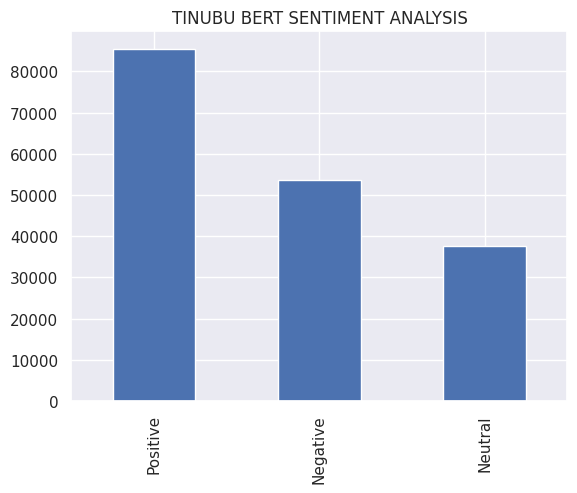

In [ ]:
Tinubu_data['Predicted_Label'].value_counts().plot(kind ='bar', title = 'TINUBU BERT SENTIMENT ANALYSIS') #Plot Tinubu sentiments graph

In [ ]:
Tinubu_data.to_csv('/content/drive/MyDrive/Project_codes/BERT_output_tinubu.csv') # save it to project file

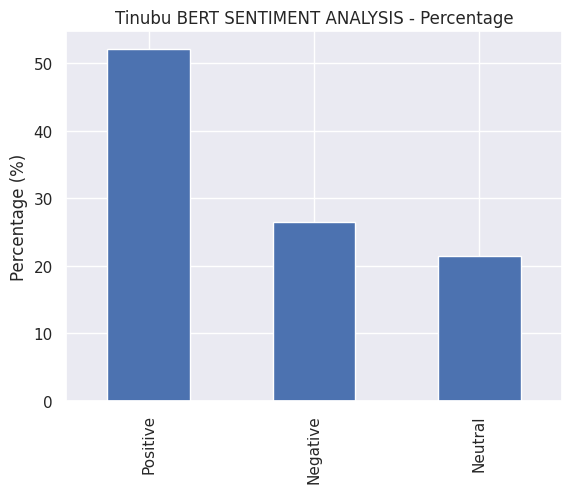

In [ ]:
import matplotlib.pyplot as plt


Tinubu_percentage_counts = (Tinubu_data['Predicted_Label'].value_counts(normalize=True) * 100).round(2)

# Plotting the percentages of Tinubu sentiments data
Tinubu_percentage_counts.plot(kind='bar', title='Tinubu BERT SENTIMENT ANALYSIS - Percentage')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
Tinubu_percentage_counts

Positive    52.08
Negative    26.49
Neutral     21.43
Name: Predicted_Label, dtype: float64

In [ ]:
# Use the model for predictions on Obi's data
path =  '/content/drive/MyDrive/Project_codes/Obi_cleaned_dataset.csv'
Obi_data = pd.read_csv(path)


Obi_data = Obi_data.replace(np.nan, '', regex=True)
Obi_text = Obi_data['cleaned_text'].tolist()

new_dataset = SentimentDataset(
    texts=Obi_text,
    labels=[0] * len(Obi_text),  # Obi labels
    tokenizer=tokenizer,
)
new_loader = DataLoader(new_dataset, batch_size=8, shuffle=False)

model.eval()
Obi_new_preds = []
with torch.no_grad():
    for batch in new_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != "label"}
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        Obi_new_preds.extend(preds.cpu().numpy())

In [ ]:
# decode the labels
Obi_Predict_label = []
for code_label in Obi_new_preds:
  if code_label == 0:
    Obi_Predict_label.append('Negative')
  elif code_label == 1:
    Obi_Predict_label.append('Neutral')
  elif code_label == 2:
    Obi_Predict_label.append('Positive')

Obi_Predict_label

['Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Neutral',
 'Negative',
 'Negative',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Negative',
 'Positive',
 'Neutral',
 'Neutral',
 'Negative',
 'Positive',
 'Positive',
 'Ne

In [ ]:
Obi_data

,Unnamed: 0,Tweet_Text,cleaned_text
0,2,b'RT @novieverest: I have said it if APC had s...,say apc single dirt peter obi would easily use...
1,3,b'RT @Mario9jaa: FUN FACT: He is now supportin...,fun fact support obi
2,4,b'RT @MimiUhiene: the most dangerous kidnappe...,dangerous kidnapper anambra peter obi governor...
3,5,b'RT @sheni_coker: Peter Obi has done his part...,peter obi do part onus u go massively vote may...
4,7,b'RT @KadunaResident: Peter Obi has taught Agb...,peter obi teach agbado tinubu show street cred...
...,...,...,...
223657,2000212,b'@dondekojo First choice: Obi Second choice: ...,first choice obi second choice obi third choic...
223658,2000216,b'@victorhabila121 @PodiumReporters @DeeOneAye...,podiumreporters deeoneayekooto peterobi tinubu...
223659,2000217,"b""RT @usmanlade: Peter Obi Vs Asiwaju Rally in...",peter obi vs asiwaju rally kwara venue e didnt...
223660,2000227,"b'Vote Peter obi of #LP for a new Nigeria, dem...",peter obi lp new nigeria democracy politics pe...


In [ ]:
Obi_data['Predicted_Label'] = Obi_Predict_label # add the list of labels to the Obi data

In [ ]:
Obi_data # the output

,Unnamed: 0,Tweet_Text,cleaned_text,Predicted_Label
0,2,b'RT @novieverest: I have said it if APC had s...,say apc single dirt peter obi would easily use...,Negative
1,3,b'RT @Mario9jaa: FUN FACT: He is now supportin...,fun fact support obi,Positive
2,4,b'RT @MimiUhiene: the most dangerous kidnappe...,dangerous kidnapper anambra peter obi governor...,Negative
3,5,b'RT @sheni_coker: Peter Obi has done his part...,peter obi do part onus u go massively vote may...,Negative
4,7,b'RT @KadunaResident: Peter Obi has taught Agb...,peter obi teach agbado tinubu show street cred...,Positive
...,...,...,...,...
223657,2000212,b'@dondekojo First choice: Obi Second choice: ...,first choice obi second choice obi third choic...,Neutral
223658,2000216,b'@victorhabila121 @PodiumReporters @DeeOneAye...,podiumreporters deeoneayekooto peterobi tinubu...,Positive
223659,2000217,"b""RT @usmanlade: Peter Obi Vs Asiwaju Rally in...",peter obi vs asiwaju rally kwara venue e didnt...,Positive
223660,2000227,"b'Vote Peter obi of #LP for a new Nigeria, dem...",peter obi lp new nigeria democracy politics pe...,Neutral


In [ ]:
Obi_data['Predicted_Label'].value_counts()


Positive    109194
Negative     63852
Neutral      50616
Name: Predicted_Label, dtype: int64

<Axes: title={'center': 'Obi BERT SENTIMENT ANALYSIS'}>

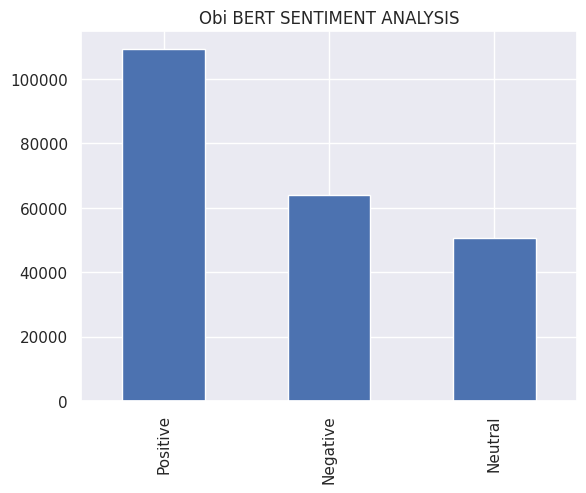

In [ ]:
Obi_data['Predicted_Label'].value_counts().plot(kind ='bar', title = 'Obi BERT SENTIMENT ANALYSIS') #Plot Obi sentiments data

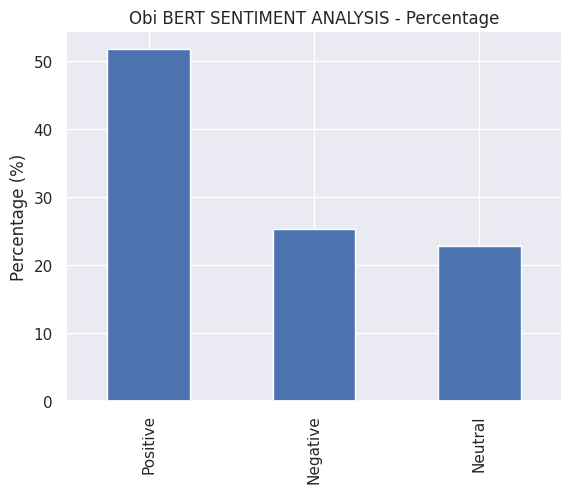

In [ ]:
Obi_percentage_counts = (Obi_data['Predicted_Label'].value_counts(normalize=True) * 100).round(2)

# Plotting the percentages of the Obi's sentiment data
Obi_percentage_counts.plot(kind='bar', title='Obi BERT SENTIMENT ANALYSIS - Percentage')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
Obi_percentage_counts

Positive    51.80
Negative    25.31
Neutral     22.88
Name: Predicted_Label, dtype: float64

In [ ]:
# Use the model for predictions on Atiku's data
path =  '/content/drive/MyDrive/Project_codes/Atiku_cleaned_dataset.csv'
Atiku_data = pd.read_csv(path)


Atiku_data = Atiku_data.replace(np.nan, '', regex=True)
Atiku_text = Atiku_data['cleaned_text'].tolist()

new_dataset = SentimentDataset(
    texts=Atiku_text,
    labels=[0] * len(Atiku_text),  # Atiku labels
    tokenizer=tokenizer,
)
new_loader = DataLoader(new_dataset, batch_size=8, shuffle=False)

model.eval()
Atiku_new_preds = []
with torch.no_grad():
    for batch in new_loader:
        inputs = {k: v.to(device) for k, v in batch.items() if k != "label"}
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        Atiku_new_preds.extend(preds.cpu().numpy())

In [ ]:
# decode Atiku's generated label
Atiku_Predict_label = []
for code_label in Atiku_new_preds:
  if code_label == 0:
    Atiku_Predict_label.append('Negative')
  elif code_label == 1:
    Atiku_Predict_label.append('Neutral')
  elif code_label == 2:
    Atiku_Predict_label.append('Positive')

Atiku_Predict_label

['Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Negative',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Ne

In [ ]:
Atiku_data

,Unnamed: 0,Tweet_Text,cleaned_text
0,0,"b'RT @kc_journalist: Elder Statesman, Tanko Ya...",elder statesman tanko yakassai drop bomb tinub...
1,38,b'RT @EstherOkokon3: @DailyPostNGR But you Kwa...,dailypostngr kwankwaso win without merge nah w...
2,52,b'@asconambassador The first time vote out APC...,first time vote apc 2019 best time 2023 yoruba...
3,60,b'RT @MimiUhiene: Atiku Won\xe2\x80\x99t Win B...,atiku wont win 22 apc governor 5 pdp governor ...
4,95,b'RT @VictorIsrael_: Tinubu went to his campai...,tinubu go campaign rally insult peter obi danc...
...,...,...,...
31849,1999957,b'No poll has projected APC to win the 2023 el...,poll project apc win 2023 election anap poll p...
31850,1999990,"b'@atiku As The Wings Of The Unifier, #AtikuYo...",wing unifier atikuyouthwing tell fact bauchi s...
31851,2000016,"b""@HAHayatu North expecially core North has al...",north ecially core north always power hungry d...
31852,2000065,b'#Trending: Inec to Postpone Election | Insec...,inec postpone election insecurity click watch ...


In [ ]:
Atiku_data['Predicted_Label'] = Atiku_Predict_label # add the list of Atiku's label to Atiku data

In [ ]:
Atiku_data # the output

In [ ]:
Atiku_data['Predicted_Label'].value_counts()

Positive    17039
Negative     8894
Neutral      5921
Name: Predicted_Label, dtype: int64

<Axes: title={'center': 'Atiku BERT SENTIMENT ANALYSIS'}>

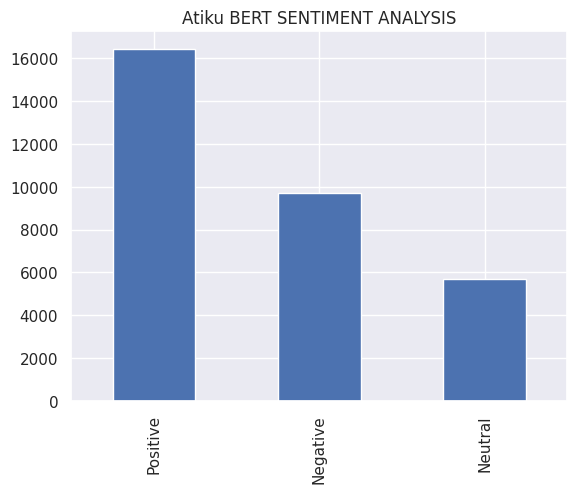

In [ ]:
Atiku_data['Predicted_Label'].value_counts().plot(kind ='bar', title = 'Atiku BERT SENTIMENT ANALYSIS') #Plot Atiku's graph

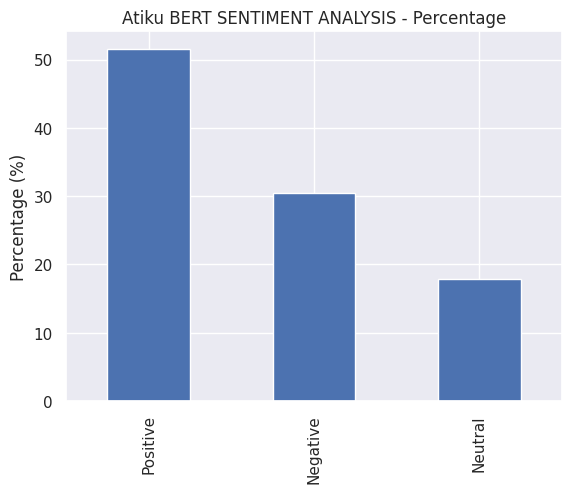

In [ ]:
Atiku_percentage_counts = (Atiku_data['Predicted_Label'].value_counts(normalize=True) * 100).round(2)

# Plotting the percentages of the Atiku sentiment data
Atiku_percentage_counts.plot(kind='bar', title='Atiku BERT SENTIMENT ANALYSIS - Percentage')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
Atiku_percentage_counts

Positive    51.54
Negative    30.52
Neutral     17.93
Name: Predicted_Label, dtype: float64

Comparative analysis of the three presidential candidates

In [ ]:
# Get Obi's data
Obi_predicted_count = Obi_data['Predicted_Label'].value_counts()
Obi_data['Predicted_Label'].value_counts()

Positive    111415
Negative     59858
Neutral      52389
Name: Predicted_Label, dtype: int64

In [ ]:
# Get Tinubu's data
Tinubu_predicted_count = Tinubu_data['Predicted_Label'].value_counts()
Tinubu_data['Predicted_Label'].value_counts()

Positive    88255
Negative    49735
Neutral     38638
Name: Predicted_Label, dtype: int64

In [ ]:
# Get Atiku's data
Atiku_predicted_count = Atiku_data['Predicted_Label'].value_counts()
Atiku_data['Predicted_Label'].value_counts()

Positive    17039
Negative     8894
Neutral      5921
Name: Predicted_Label, dtype: int64

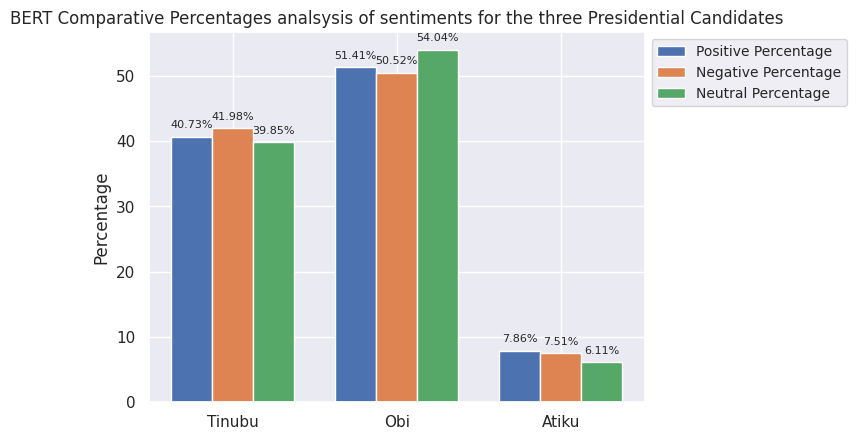

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the list of the three presidential's candidates and the unique lidt of the categories
labels = ['Tinubu', 'Obi', 'Atiku']
categories = ['Positive', 'Negative', 'Neutral']

# Counts for each category within each names
data = np.array([
    [Tinubu_predicted_count['Positive'], Tinubu_predicted_count['Negative'], Tinubu_predicted_count['Neutral']],  # Tinubu
    [Obi_predicted_count['Positive'], Obi_predicted_count['Negative'], Obi_predicted_count['Neutral']],  #Obi
    [Atiku_predicted_count['Positive'], Atiku_predicted_count['Negative'], Atiku_predicted_count['Neutral']],  # Atiku
])

# Calculate overall counts for each category
overall_category_counts = np.sum(data, axis=0)

# Calculate relative percentages
relative_percentages = (data / overall_category_counts) * 100

# Plotting
fig, ax = plt.subplots()

# Plot stacked bar chart
bar_width = 0.25
bar_positions = np.arange(len(labels))

for i, category in enumerate(categories):
    ax.bar(bar_positions + i * bar_width, relative_percentages[:, i], width=bar_width, label=f'{category} Percentage')

# Modifying the bar and legends labels
ax.set_ylabel('Percentage')
ax.set_title('BERT Comparative Percentages analsysis of sentiments for the three Presidential Candidates')
ax.set_xticks(bar_positions + (len(categories) - 1) * bar_width / 2)
ax.set_xticklabels(labels)
legend = ax.legend(fontsize='small', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to position the legend

# Display percentages on top of bars with reduced font size
for i, bar_position in enumerate(bar_positions):
    for j, category in enumerate(categories):
        yval = relative_percentages[i, j]
        ax.text(bar_position + j * bar_width, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=8)

plt.show()


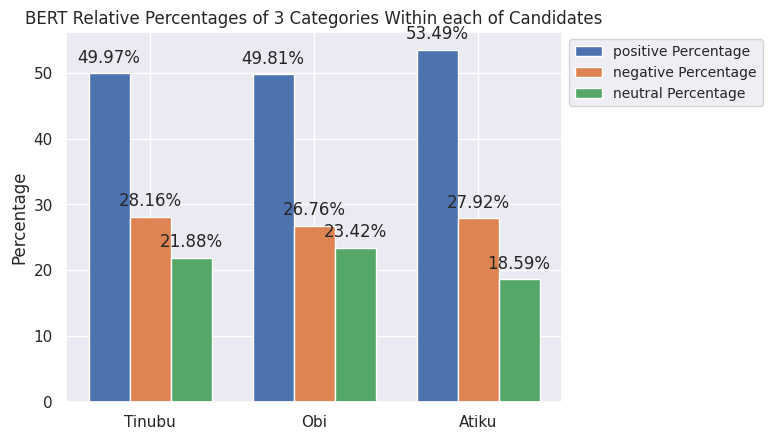

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# list of names and categoies
labels = ['Tinubu', 'Obi', 'Atiku']
categories = ['positive', 'negative', 'neutral']

# Percentages for each category within each names
data = np.array([
    [Tinubu_predicted_count['Positive'], Tinubu_predicted_count['Negative'], Tinubu_predicted_count['Neutral']],  # Tinubu
    [Obi_predicted_count['Positive'], Obi_predicted_count['Negative'], Obi_predicted_count['Neutral']],  # Obi
    [Atiku_predicted_count['Positive'], Atiku_predicted_count['Negative'], Atiku_predicted_count['Neutral']],  # Atiku
])

# Calculate overall percentages for each label
overall_percentages = np.sum(data, axis=1)

# Normalize data to get relative percentages
normalized_data = (data.T / overall_percentages).T * 100

# Plotting
fig, ax = plt.subplots()

# Plot stacked bar chart
bar_width = 0.25
bar_positions = np.arange(len(labels))

for i, category in enumerate(categories):
    ax.bar(bar_positions + i * bar_width, normalized_data[:, i], width=bar_width, label=f'{category} Percentage')

# Adding labels
ax.set_ylabel('Percentage')
ax.set_title('BERT Relative Percentages of 3 Categories Within each of Candidates')
ax.set_xticks(bar_positions + (len(categories) - 1) * bar_width / 2)
ax.set_xticklabels(labels)
legend = ax.legend(fontsize='small', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to position the legend

# Display percentages on top of bars
for i, bar_position in enumerate(bar_positions):
    for j, category in enumerate(categories):
        yval = normalized_data[i, j]
        ax.text(bar_position + j * bar_width, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()